<a href="https://colab.research.google.com/github/amitkatoch/TOPSIS/blob/main/TOPSIS_TEXT_GENERATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Define pretrained models and criteria

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#AMIT_KATOCH_102203451
models = ["GPT-4", "LLaMA 2", "Mistral", "Falcon", "Claude"]
criteria = ["BLEU Score", "ROUGE Score", "Perplexity", "Response Time (ms)"]
weights = np.array([0.3, 0.3, 0.2, 0.2])  # Assigning weights


# Step 2: Sample performance data

In [3]:

performance_data = np.array([
    [35, 40, 8, 200],  # GPT-4
    [33, 38, 10, 180],  # LLaMA 2
    [36, 42, 7, 190],  # Mistral
    [30, 35, 12, 210],  # Falcon
    [34, 39, 9, 195]   # Claude
])
#AMIT_KATOCH_102203451

# Step 3: Normalize the dataset

---
# Adjust for beneficial and non-beneficial criteria (Perplexity & Response Time are non-beneficial)



In [4]:

normalized_data = performance_data / np.sqrt((performance_data**2).sum(axis=0))
#AMIT_KATOCH_102203451
normalized_data[:, 2:] = 1 - normalized_data[:, 2:]

# Step 4: Compute weighted normalized matrix
# Step 5: Determine ideal and negative ideal solutions
# Step 6: Compute distances from ideal and negative ideal solutions

In [5]:

weighted_data = normalized_data * weights

#AMIT_KATOCH_102203451
ideal_solution = np.max(weighted_data, axis=0)
negative_ideal_solution = np.min(weighted_data, axis=0)

dist_ideal = np.sqrt(((weighted_data - ideal_solution) ** 2).sum(axis=1))
dist_negative_ideal = np.sqrt(((weighted_data - negative_ideal_solution) ** 2).sum(axis=1))

# Step 7: Compute TOPSIS scores
# Step 8: Rank models based on scores

In [6]:

topsis_scores = dist_negative_ideal / (dist_ideal + dist_negative_ideal)
#AMIT_KATOCH_102203451

rankings = np.argsort(topsis_scores)[::-1] + 1


# Create a results DataFrame

In [7]:

results_df = pd.DataFrame({
    "Model": models,
    "TOPSIS Score": topsis_scores,
    "Rank": rankings
}).sort_values(by="Rank")


# Step 9: Plot results

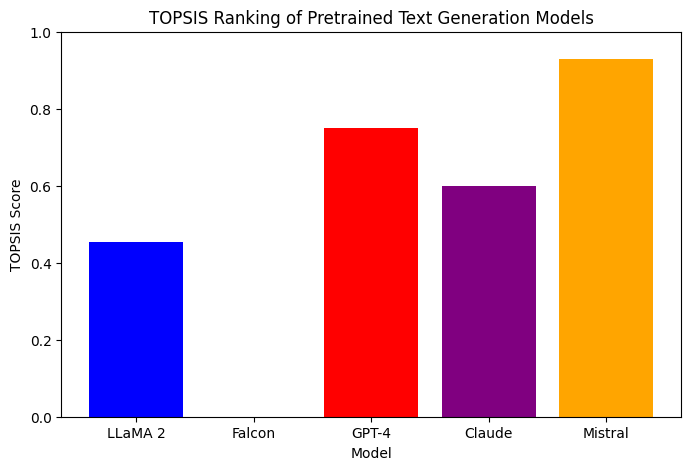

In [8]:

plt.figure(figsize=(8, 5))
plt.bar(results_df["Model"], results_df["TOPSIS Score"], color=["blue", "green", "red", "purple", "orange"])
plt.xlabel("Model")
plt.ylabel("TOPSIS Score")
plt.title("TOPSIS Ranking of Pretrained Text Generation Models")
plt.ylim(0, 1)
plt.show()
#AMIT_KATOCH_102203451

# Save results as CSV
# Display final rankings

In [10]:
# Sort models by TOPSIS score in descending order
results_df = results_df.sort_values(by="TOPSIS Score", ascending=False)

# Assign correct ranks
results_df["Rank"] = results_df["TOPSIS Score"].rank(method="max", ascending=False).astype(int)

# Save and display results
results_df.to_csv("topsis_results.csv", index=False)
print("Final TOPSIS Rankings:")
print(results_df)
#AMIT_KATOCH_102203451


Final TOPSIS Rankings:
     Model  TOPSIS Score  Rank
2  Mistral      0.928350     1
0    GPT-4      0.751209     2
4   Claude      0.600141     3
1  LLaMA 2      0.454839     4
3   Falcon      0.000000     5
